In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

<center>
<img src="imgs/ETTI_intro.jpg"  alt="drawing" width="45%"/>
</center>

In [ ]:
#import sympy as sp

### Cálculo de la rentabilidad de bonos (yield curve)

<left>
<img src="imgs/Datos bonos inicio.PNG"  alt="drawing" width="45%"/>
</left>

In [3]:
bonds_df1 =pd.DataFrame()
bonds_df1['Maturity'] = [1,2,3,4]
bonds_df1['Price'] = [1000, 995.49, 989.08, 982.63]
bonds_df1

,Maturity,Price
0,1,1000.00
1,2,995.49
2,3,989.08
3,4,982.63


Calculamos la yield curve a partir de los datos de los bonos

<center>
<img src="imgs/Bonos cash flows.PNG"  alt="drawing" width="26%"/>
<img src="imgs/TIR bonos.PNG"  alt="drawing" width="50%"/>
</center>

In [3]:
rent = [0.05]
x = Symbol('x', real=True, positive=True)

eq = 50/(1+x) + 1050/(1+x)**2 -995.49
rent.append(solve(eq, x)[0].round(4))

eq = 50/(1+x) + 50/(1+x)**2 + 1050/(1+x)**3 - 989.08
rent.append(solve(eq, x)[0].round(4))

eq = 50/(1+x) + 50/(1+x)**2 + 50/(1+x)**3 + 1050/(1+x)**4 - 982.63
rent.append(solve(eq, x)[0].round(4))

bonds_df1['rent']=np.array(rent) * 100
bonds_df1

,Maturity,Price,rent
0,1,1000.00,5.0
1,2,995.49,5.24
2,3,989.08,5.40
3,4,982.63,5.50


<center>
<img src="imgs/Bonos cash flows.PNG"  alt="drawing" width="30%"/>
<img src="imgs/tipos spot.PNG"  alt="drawing" width="60%"/>
</center>

In [4]:
spots = [0.05]

eq = 50/(1+spots[0]) + 1050/(1+x)**2 -995.49
spots.append(solve(eq, x)[0].round(4))

eq = 50/(1+spots[0]) + 50/(1+spots[1])**2 + 1050/(1+x)**3 - 989.08
spots.append(solve(eq, x)[0].round(4))

eq = 50/(1+spots[0]) + 50/(1+spots[1])**2 + 50/(1+spots[2])**3 + 1050/(1+x)**4 - 982.63
spots.append(solve(eq, x)[0].round(4))

bonds_df1['spots']=(np.array(spots) * 100)
bonds_df1


,Maturity,Price,rent,spots
0,1,1000.00,5.0,5.0
1,2,995.49,5.24,5.25
2,3,989.08,5.40,5.42
3,4,982.63,5.50,5.51


<center>
<img src="./imgs/Int_Fw.PNG"  alt="drawing" width="35%"/>
</center>

In [6]:
tasas_teo = pd.DataFrame()
tasas_teo['Maturity'] = [1,2,3,4]
tasas_teo['Spot'] = ['s1', 's2' , 's3', 's4']
tasas_teo['Diff'] = tasas_teo['Spot'].shift()
tasas_teo

,Maturity,Spot,Diff
0,1,s1,None
1,2,s2,s1
2,3,s3,s2
3,4,s4,s3


In [19]:

tasas_interes = pd.read_csv('data/tipos_interes.csv', sep=';')
tasas_interes

,Plazo,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago
0,1,-0.482,-0.334,-0.240,0.024,0.313,0.850,0.905,1.206
1,2,-0.243,0.120,0.268,0.740,0.948,1.544,1.287,1.542
2,3,-0.077,0.350,0.493,1.027,1.188,1.763,1.412,1.611
3,4,0.028,0.469,0.621,1.161,1.329,1.885,1.525,1.666
4,5,0.098,0.537,0.710,1.239,1.429,1.976,1.633,1.721
5,7,0.215,0.627,0.830,1.345,1.575,2.094,1.792,1.813
6,10,0.377,0.747,0.993,1.487,1.761,2.254,1.995,1.947
7,15,0.543,0.857,1.130,1.599,1.899,2.379,2.182,2.069
8,20,0.581,0.848,1.084,1.529,1.819,2.287,2.117,1.977
9,30,0.500,0.722,0.867,1.286,1.547,2.045,1.863,1.738


In [20]:
tasas_fw = tasas_interes[['Plazo', 'Ago']]
tasas_fw.columns = ['Maturity', 'Spot_Rate']
tasas_fw

,Maturity,Spot_Rate
0,1,1.206
1,2,1.542
2,3,1.611
3,4,1.666
4,5,1.721
5,7,1.813
6,10,1.947
7,15,2.069
8,20,1.977
9,30,1.738


In [21]:
tasas_fw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Maturity   10 non-null     int64  
 1   Spot_Rate  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [23]:
tasas_fw["Spot_Rate_Shift"] = tasas_fw["Spot_Rate"].shift(1, fill_value=0)
tasas_fw["Forward_Rate"] = (((1 + tasas_fw["Spot_Rate"]) ** tasas_fw["Maturity"]) / 
                       ((1 + tasas_fw["Spot_Rate_Shift"]) ** (tasas_fw["Maturity"] - 1)) - 1)

tasas_fw

/tmp/ipykernel_4158/3355309983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasas_fw["Spot_Rate_Shift"] = tasas_fw["Spot_Rate"].shift(1, fill_value=0)
/tmp/ipykernel_4158/3355309983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasas_fw["Forward_Rate"] = (((1 + tasas_fw["Spot_Rate"]) ** tasas_fw["Maturity"]) /


,Maturity,Spot_Rate,Spot_Rate_Shift,Forward_Rate
0,1,1.206,0.000,1.206000
1,2,1.542,1.206,1.929177
2,3,1.611,1.542,1.754670
3,4,1.666,1.611,1.838049
4,5,1.721,1.666,1.952583
5,7,1.813,1.721,2.434131
6,10,1.947,1.813,3.479956
7,15,2.069,1.947,4.415411
8,20,1.977,2.069,0.669690
9,30,1.738,1.977,-0.758222


Valoración de bonos

<left>
<img src="./imgs/Bono discreto.png"  alt="drawing" width="35%"/>
</left>

<left>
<img src="./imgs/Val bono matriz.png"  alt="drawing" width="35%"/>
</left>

In [26]:
bonds_df = pd.read_csv('data/Bonds.csv', sep=';')
bonds_df

,Bond,Price,Maturity,Coupon
0,A,96.60,1,2.0
1,B,93.71,2,2.5
2,C,91.56,3,3.0
3,D,90.24,4,3.5
4,E,89.74,5,4.0
5,F,90.04,6,4.5
6,G,91.09,7,5.0
7,H,92.82,8,5.5
8,I,95.19,9,6.0
9,J,98.14,10,6.5


In [27]:
maturity_max = bonds_df['Maturity'].max()

In [40]:
[5]*3

[5, 5, 5]

In [44]:
array = []
for i in bonds_df.iterrows(): 
    # [Cupón en € tantas veces como Maturity -1] + [100+Cupón] + [Tantos '0' como diferencia entre maturity del bono y max maturity]
    x = [i[1][3]]*(i[1][2]-1)+[(100+i[1][3])] + [0]*(maturity_max-i[1][2]) # Sumar listas las concatena
    array.append(x)

cash_flows_df = pd.DataFrame(np.array(array))
cash_flows_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,102.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.5,3.5,3.5,103.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,4.5,4.5,4.5,4.5,104.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,5.0,5.0,5.0,5.0,5.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.5,5.5,5.5,5.5,5.5,5.5,5.5,105.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,106.5,0.0,0.0,0.0,0.0,0.0


In [45]:
cash_flows_inv_df = np.linalg.inv(cash_flows_df)
disc_factor = cash_flows_inv_df @ bonds_df['Price']
disc_factor

array([0.94705882, 0.89114491, 0.83539212, 0.7814726 , 0.72999737,
       0.68140865, 0.63578693, 0.59296268, 0.55300618, 0.51574181,
       0.48086164, 0.44840695, 0.41809328, 0.38980333, 0.36348408])

In [18]:
etti_df = pd.DataFrame()
etti_df['rates'] = (-100 * np.log(disc_factor)/bonds_df['Maturity'])
etti_df.index = bonds_df['Maturity']
etti_df


,rates
Maturity,
1,5.439407
2,5.762412
3,5.995135
4,6.164380
5,6.294287
6,6.393218
7,6.469883
8,6.532798
9,6.582068


<AxesSubplot: xlabel='Maturity'>

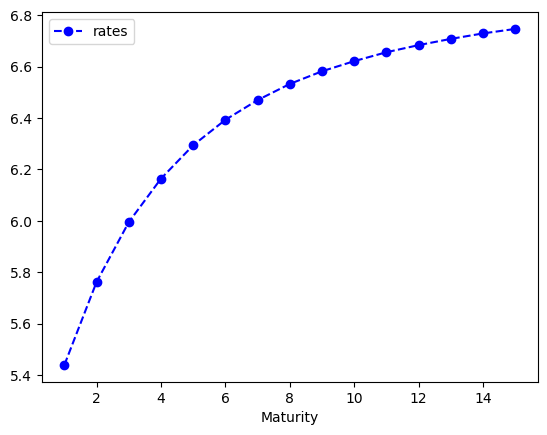

In [19]:
etti_df.plot(marker='o', linestyle='--', color='b')

¿Cómo valorar un bono?

In [51]:
def val_bono(coupon, maturity, discount):
    cash_flow = [coupon] * (maturity-1) + [100 + coupon] 
    return cash_flow @ discount[:len(cash_flow)]


In [52]:
val_bono(3, 5, disc_factor)

85.55493417443927

In [3]:
bonds_df_mult = pd.read_csv('data/Bonds_mult.csv', sep=';')
bonds_df_mult

,Bond,Price,Maturity,Coupon
0,A,91.897,1,2.0
1,B,83.256,2,2.5
2,C,76.000,3,3.0
3,D,76.235,3,3.2
4,E,71.211,4,3.5
5,F,67.967,5,4.0
6,G,66.000,6,4.5
7,H,66.163,6,4.2
8,I,65.488,7,5.0
9,J,65.700,8,5.5


In [4]:
maturity_max_mult = bonds_df_mult['Maturity'].max()
maturity_max_mult

12

In [5]:
array_mult = []
for i in bonds_df_mult.iterrows(): 
    # [Cupón en € tantas veces como Maturity -1] + [100+Cupón] + [Tantos '0' como diferencia entre maturity del bono y max maturity]
    x = [i[1][3]]*(i[1][2]-1)+[(100+i[1][3])] + [0]*(maturity_max_mult-i[1][2]) # Sumar listas las concatena
    array_mult.append(x)

cash_flows_mult_df = pd.DataFrame(np.array(array_mult))
cash_flows_mult_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,102.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.2,3.2,103.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,3.5,3.5,103.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.5,4.5,4.5,4.5,4.5,104.5,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,4.2,4.2,4.2,4.2,104.2,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,5.0,5.0,5.0,5.0,5.0,105.0,0.0,0.0,0.0,0.0,0.0
9,5.5,5.5,5.5,5.5,5.5,5.5,5.5,105.5,0.0,0.0,0.0,0.0


In [21]:
disc_factor_mult = np.linalg.inv(cash_flows_mult_df.T @ cash_flows_mult_df) @ cash_flows_mult_df.T @ bonds_df_mult['Price']
disc_factor_mult

0     0.900943
1     0.790271
2     0.687433
3     0.607586
4     0.538668
5     0.486323
6     0.432697
7     0.391089
8     0.347329
9     0.323134
10    0.294483
11    0.268710
dtype: float64

In [27]:
bonds_df_mult['Price_calc'] = cash_flows_mult_df @ disc_factor_mult

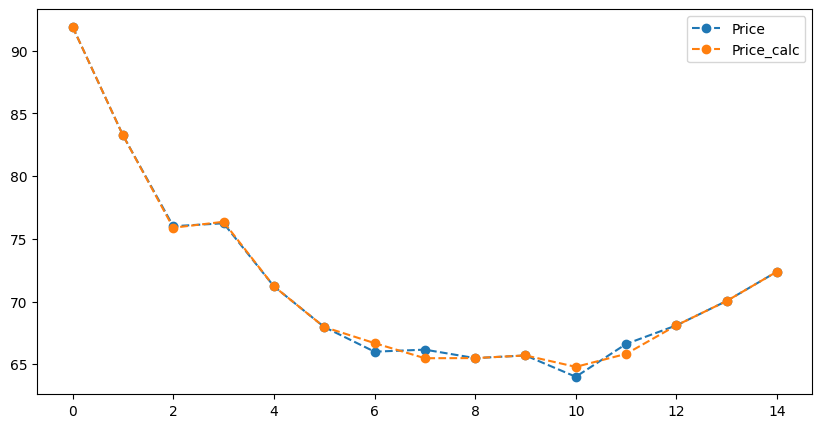

In [37]:
bonds_df_mult[['Price', 'Price_calc']].plot(figsize=(10,5), marker='o', linestyle='--');

<AxesSubplot: >

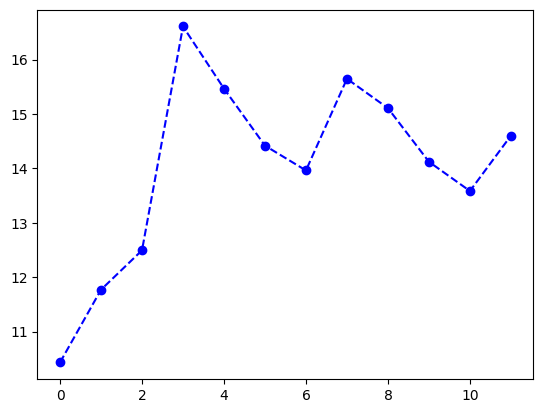

In [13]:

etti_mult_df = - 100 * np.log(disc_factor_mult)/bonds_df_mult['Maturity']
etti_mult_df.plot(marker='o', linestyle='--', color='b')